In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import matplotlib.patches as mpatches
from pyecharts.charts import Pie
from pyecharts import options as opts
import squarify
import calendar

Dataset :
https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies

In [41]:
df_movies = pd.DataFrame(pd.read_csv("data/highest_hollywood_grossing_movies.csv")).iloc[:, 1:]

In [42]:
def convert_in_min(row):
    time = row["Movie Runtime"].split(" ")
    hours_in_min = int(time[0]) * 60 
    
    if len(time) >= 3:
        hours_in_min += int(time[2])
    # try:
    #     hours_in_min += int(time[2])
    # except:
    #     pass
    row["Movie Runtime"] = hours_in_min
    return row

df_movies = df_movies.apply(convert_in_min, axis=1)

In [43]:
df_movies["Release Date"] = pd.to_datetime(df_movies["Release Date"], format="%B %d, %Y")

In [44]:
df_movies["Genre"] = df_movies["Genre"].apply(literal_eval)

In [45]:
df_movies.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"[Action, Adventure, Sci-Fi]",138,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"[Action, Adventure, Drama, Sci-Fi]",181,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"[Action, Adventure, Fantasy, Sci-Fi]",162,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"[Action, Adventure, Sci-Fi]",134,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"[Action, Adventure, Sci-Fi]",149,NaN


In [46]:
df_movies.tail()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,2004-06-25,81001787,36813370,117815157,"[Drama, Romance]",123,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,2001-12-21,80936232,22056304,102992536,"[Action, Adventure, Animation, Comedy, Family,...",82,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,"[Biography, Drama, Romance]",133,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,2003-10-17,80571655,26792250,107363905,"[Crime, Horror]",98,R
917,Zookeeper (2011),A group of zoo animals decide to break their c...,Sony Pictures Entertainment (SPE),2011-07-06,80360843,89491916,169852759,"[Comedy, Family, Fantasy, Romance]",102,PG


In [47]:
grouped = df_movies.groupby("Distributor")
groupedDistributor = grouped.sum()
groupedDistributor["Quantity of movies"] = grouped.size()

In [48]:
groupedDistributor.head()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,Quantity of movies
Distributor,,,,,
20th Century Studios,121626598,209877159,331503757,115,1
Artisan Entertainment,140539099,108100000,248639099,81,1
Columbia Pictures,956287379,680419247,1374209626,834,7
Dimension Films,691875387,531129726,1223005113,698,7
DreamWorks,4040554079,6372421823,10412975902,2198,21


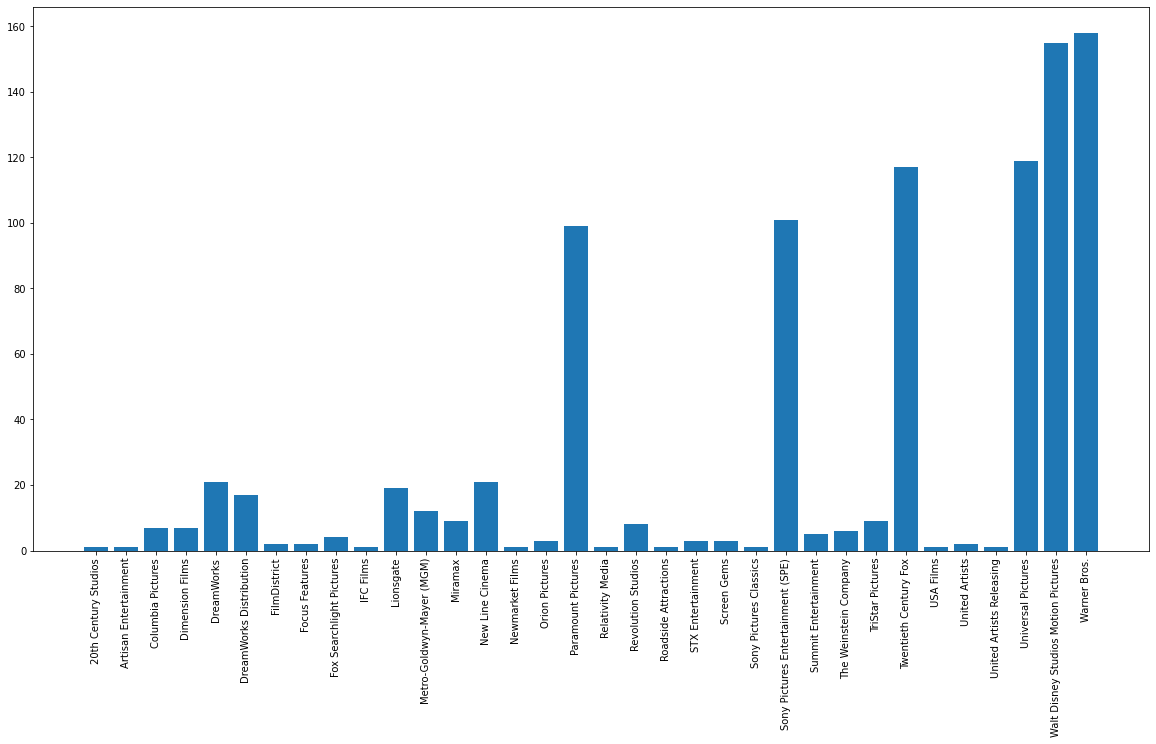

In [49]:
plt.figure(figsize=(20,10))
plt.bar(data=groupedDistributor, x=groupedDistributor.index, height="Quantity of movies")
plt.xticks(rotation = 90);

In [50]:
groupedDistributor["Average sales by movies"] = groupedDistributor["World Sales (in $)"] / groupedDistributor["Quantity of movies"]
groupedDistributor.head()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,Quantity of movies,Average sales by movies
Distributor,,,,,,
20th Century Studios,121626598,209877159,331503757,115,1,3.315038e+08
Artisan Entertainment,140539099,108100000,248639099,81,1,2.486391e+08
Columbia Pictures,956287379,680419247,1374209626,834,7,1.963157e+08
Dimension Films,691875387,531129726,1223005113,698,7,1.747150e+08
DreamWorks,4040554079,6372421823,10412975902,2198,21,4.958560e+08


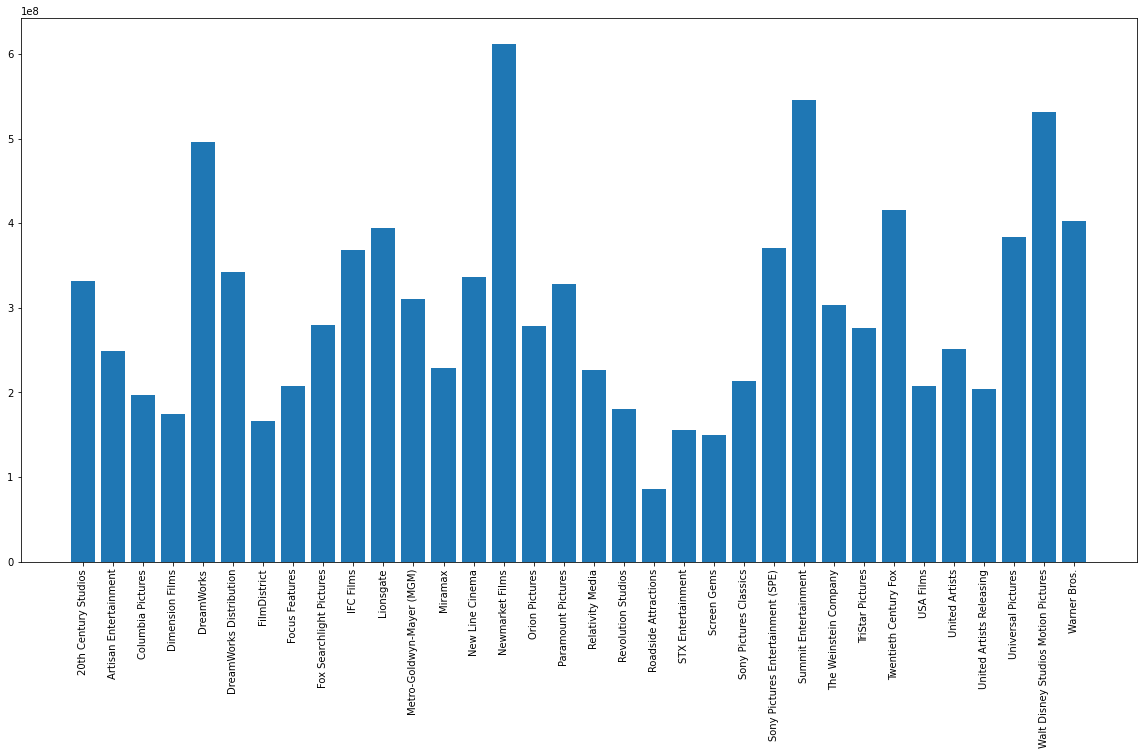

In [51]:
plt.figure(figsize=(20,10))
plt.bar(data=groupedDistributor, x=groupedDistributor.index, height="Average sales by movies")
plt.xticks(rotation = 90);

In [52]:
df_movies[df_movies["Distributor"] == "Newmarket Films"]

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
47,The Passion of the Christ (2004),Depicts the final twelve hours in the life of ...,Newmarket Films,2004-02-25,370782930,241271576,612054506,[Drama],127,R


In [53]:
df_movies[df_movies["Distributor"] == "Summit Entertainment"]

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
89,The Twilight Saga: Eclipse (2010),As a string of mysterious killings grips Seatt...,Summit Entertainment,2010-06-30,300531751,397959596,698491347,"[Action, Adventure, Drama, Fantasy, Romance, T...",124,PG-13
90,The Twilight Saga: New Moon (2009),Edward leaves Bella after an attack that nearl...,Summit Entertainment,2009-11-18,297816253,413209228,711025481,"[Adventure, Drama, Fantasy, Romance]",130,PG-13
105,The Twilight Saga: Breaking Dawn - Part 1 (2011),The Quileutes close in on expecting parents Ed...,Summit Entertainment,2011-11-16,281287133,430918723,712205856,"[Adventure, Drama, Fantasy, Romance, Thriller]",117,PG-13
225,Twilight (2008),When Bella Swan moves to a small town in the P...,Summit Entertainment,2008-11-20,193962473,214467942,408430415,"[Drama, Fantasy, Romance]",122,PG-13
803,RED (2010),When his peaceful life is threatened by a high...,Summit Entertainment,2010-10-14,90380162,108626225,199006387,"[Action, Comedy, Crime, Thriller]",111,PG-13


In [55]:
licences = pd.DataFrame(df_movies["License"].value_counts()).rename(columns={'License': 'Quantity'})
licences


,Quantity
PG-13,363
R,194
PG,173
G,14


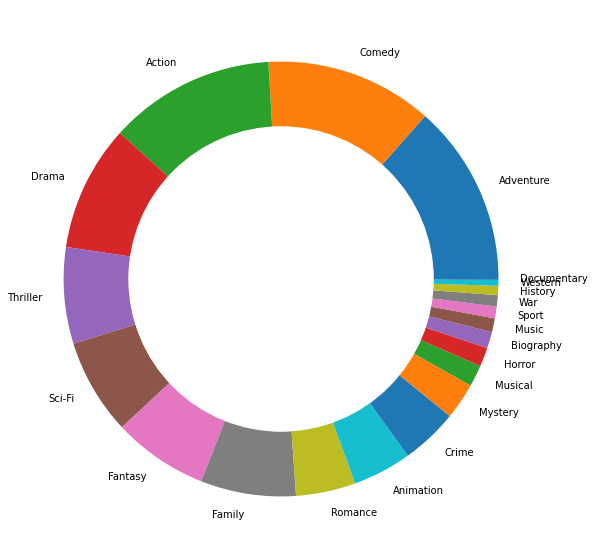

In [106]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(20,10) )

genres = pd.DataFrame(df_movies["Genre"].explode().value_counts()).rename(columns={'Genre': 'Quantity'})

circle = plt.Circle((0,0), 0.7, color='white');

ax.pie(genres.Quantity, labels=genres.index);

p = plt.gcf()

p.gca().add_artist(circle);

In [57]:
groupedDistributor.corr()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,Quantity of movies,Average sales by movies
Domestic Sales (in $),1.000000,0.998352,0.999347,0.981568,0.985639,0.491563
International Sales (in $),0.998352,1.000000,0.999759,0.977886,0.982048,0.495660
World Sales (in $),0.999347,0.999759,1.000000,0.980181,0.984274,0.494291
Movie Runtime,0.981568,0.977886,0.980181,1.000000,0.999305,0.454878
Quantity of movies,0.985639,0.982048,0.984274,0.999305,1.000000,0.460138
Average sales by movies,0.491563,0.495660,0.494291,0.454878,0.460138,1.000000


A voir : 

- Ventes totales par rapport au genre

In [58]:
genres['Domestic Sales'] = [df_movies[df_movies["Genre"].apply(lambda x : genre in x)]['Domestic Sales (in $)'].sum() for genre in genres.index]
genres['International Sales'] = [df_movies[df_movies["Genre"].apply(lambda x : genre in x)]['International Sales (in $)'].sum() for genre in genres.index]
genres['World Sales'] = [df_movies[df_movies["Genre"].apply(lambda x : genre in x)]['World Sales (in $)'].sum() for genre in genres.index]

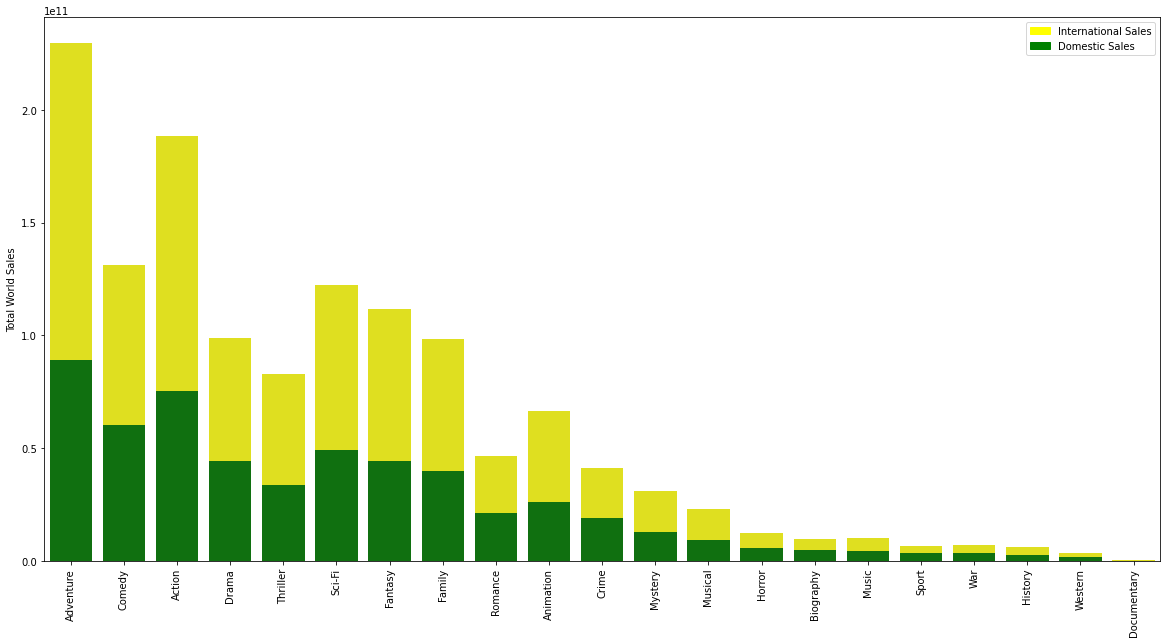

In [59]:
plt.figure(figsize=(20, 10))

bar1 = sns.barplot(x=genres.index,  y='World Sales', data=genres, color='yellow')
bar2 = sns.barplot(x=genres.index, y='Domestic Sales', data=genres, color='green')
bar2.set_ylabel('Total World Sales')

top_bar = mpatches.Patch(color='yellow', label='International Sales')
bottom_bar = mpatches.Patch(color='green', label='Domestic Sales')
plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(rotation = 90);

plt.show();

In [60]:
grouped = df_movies.groupby("Distributor")
groupedDistributor = grouped.sum()
groupedDistributor["Quantity of movies"] = grouped.size()

Durée totale par distributeur

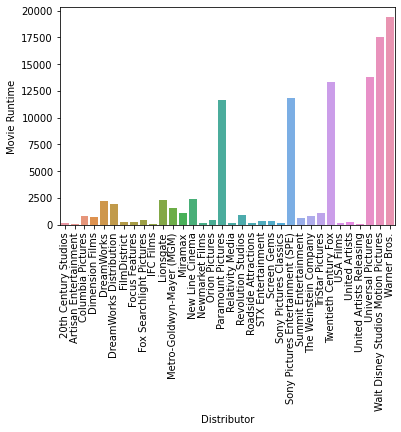

In [61]:
sns.barplot(data=groupedDistributor, x=groupedDistributor.index, y="Movie Runtime")
plt.xticks(rotation = 90);

Quantité de film par année

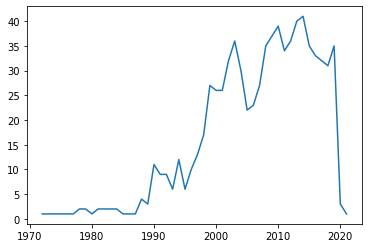

In [62]:
groupedByDate = df_movies.groupby(df_movies["Release Date"].dt.year).size()
plt.plot(groupedByDate.index, groupedByDate.values);

Durée moyenne par genre

In [63]:
genres.head()

,Quantity,Domestic Sales,International Sales,World Sales
Adventure,432,89126401658,140645339891,229470200349
Comedy,399,60311556016,71496471163,131008997340
Action,396,75580282948,112781141423,188363792761
Drama,300,44438357025,55086171131,98963789161
Thriller,230,33716073278,49317730580,82945767175


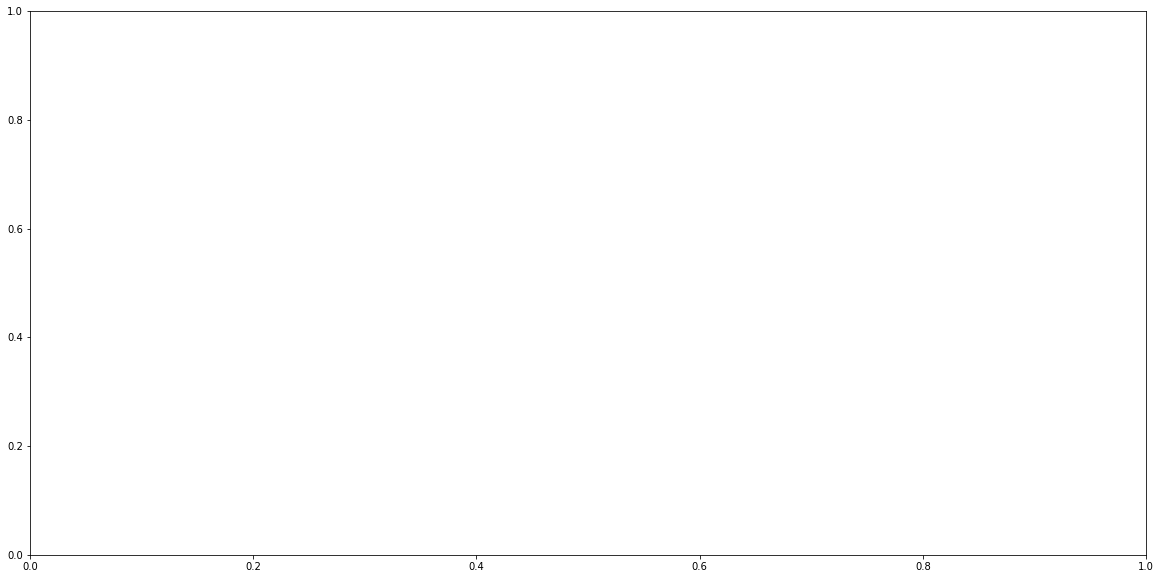

In [107]:
genres["Mean Runtime"] = [round(df_movies[df_movies["Genre"].apply(lambda x : genre in x)]['Movie Runtime'].mean(), 2) for genre in genres.index]

genres_names = genres.index.tolist()
genres_runtime = genres["Mean Runtime"].tolist()


fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(20,10) )


rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
rosechart.add("", [list(z) for z in zip(genres_names, genres_runtime)],
        radius=["35%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='Durée moyenne par genre',subtitle="Nightingale Rose Chart"),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())
# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,formatter="{b}:{c}", font_style="italic",font_weight="bold", font_family="Century"),)
fig.savefig('./static/images/test.png', bbox_inches = 'tight')


Quantité de films sortis par mois

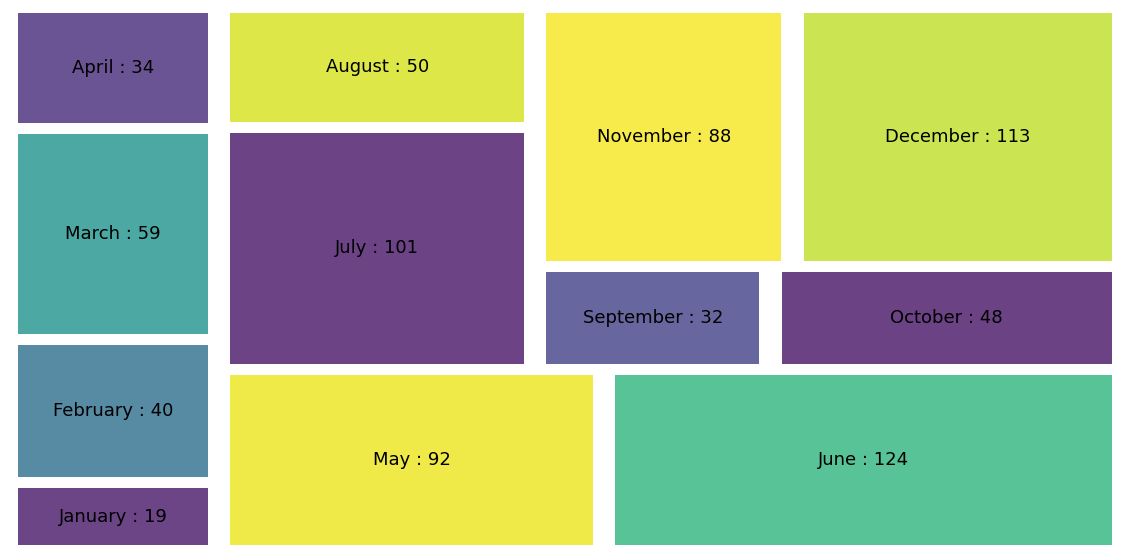

In [82]:
groupedByMonth = df_movies.groupby(df_movies["Release Date"].dt.month).size()

labels = [f"{calendar.month_name[i+1]} : {v}" for i, v in enumerate(groupedByMonth)]

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(20,10) )
plt.axis('off')
squarify.plot(sizes=groupedByMonth.values, label=labels, alpha=.8, text_kwargs={'fontsize':18}, pad=True);

Durée moyenne par distributeur

In [ ]:
df_movies.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"[Action, Adventure, Sci-Fi]",138,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"[Action, Adventure, Drama, Sci-Fi]",181,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"[Action, Adventure, Fantasy, Sci-Fi]",162,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"[Action, Adventure, Sci-Fi]",134,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"[Action, Adventure, Sci-Fi]",149,NaN


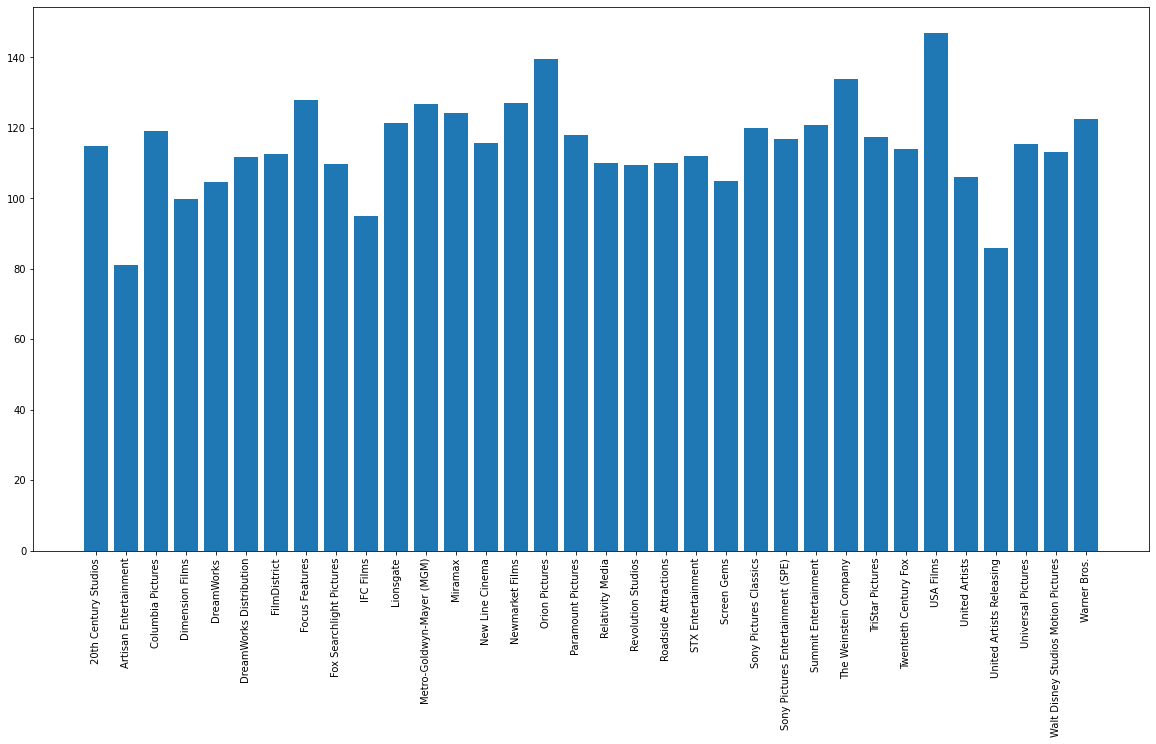

In [ ]:
plt.figure(figsize=(20, 10))

groupedByDist = df_movies.groupby(df_movies["Distributor"]).mean()["Movie Runtime"]
plt.bar(groupedByDist.index, groupedByDist.values)
plt.xticks(rotation = 90);

- Ventes totales par rapport à l'année
- Ventes totales par rapport à la licence
- Ventes totales par rapport à la durée du film
- Repartition des films dans le top 1000 par année
- Repartition des films dans le top 1000 par licence
- Quartiles/moyennes sur la durée et/ou sur les ventes
- Genres par distributeur
- Distributeur par licence
